In [18]:
# Imports
import matplotlib.pyplot as plt

from maze_dataset.generation import LatticeMazeGenerators
from maze_dataset.plotting import MazePlot
from Maze_env.reward_functions.basic import BasicRewardFun
from Maze_env.reward_functions.maze_runner import MazeRunnerRewardsFun
from Maze_env.game_info import maze_runner_info,hunger_games_info
from DQN.agents import multihead_basic
import numpy as np
import DQN.agents.basic as basic
import DQN.agents.runner_agent as runners
from DQN.agents.hungermaze import HungerGamesAgent
import DQN.models.base as base
import maze_generator.maze_dataset as md
import maze_dataset
import Maze_env.wrappers.reward_wrappers.runner_rewards as rw



In [19]:
dataset = md.Maze_dataset(1,(3,3),'percolation',)
maze = dataset[0]



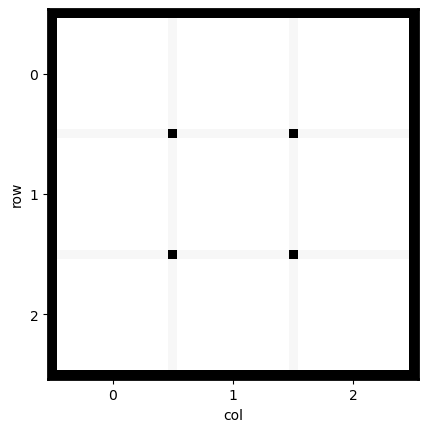

In [20]:
for i in range(len(dataset)):
    dataset.show_maze(i)

In [21]:
# Check Basic Maze Environment 
rewards = BasicRewardFun(GOAL = 75.0,
                         Fail = -75.0)

mult_agent = HungerGamesAgent(model={'agents':base.basic_NN},vision={'agents':3},action_type='cardinal',
                                dist_paradigm='path')

mult_agent.run_agent(maze,len_game=100,num_objects={'agents':2},epsilon=1,
                     start_dist=None)

cumulative reward: {'agents': [-32.62510288065844, -33.82654320987655]}


/home/cody/miniconda3/envs/GameRFL/lib/python3.12/site-packages/gymnasium/utils/passive_env_checker.py:245: UserWarning: WARN: The reward returned by `step()` must be a float, int, np.integer or np.floating, actual type: <class 'dict'>
  logger.warn(


In [22]:
rewards = MazeRunnerRewardsFun(GOAL = 75.0,
                         SEE_GOAL = 0.05,
                         DONT_SEE_GOAL = -0.01,
                         NEW_PLACE = 0.05,
                         OLD_PLACE = -0.5,
                         GET_CLOSER = 7.0, 
                         GET_CLOSER_CONSTANT = 3.1,
                         GET_FARTHER = -0.00,
                         GET_FARTHER_CONSTANT = -0.1,
                         DIST = 0.0)

mazeRunner =runners.MazeRunnerAgent(model={'agents':base.basic_NN},vision={'agents':3},action_type='cardinal', 
                                    dist_paradigm='path'
                                    ) 
mazeRunner.run_agent(maze,len_game=30,num_objects={'agents':2},epsilon=1,
                     start_dist=None)

goal
goal
goal
goal
goal
goal
goal
goal
goal
goal
cumulative reward: {'agents': [-228.59259259259258, -73.84444444444448]}


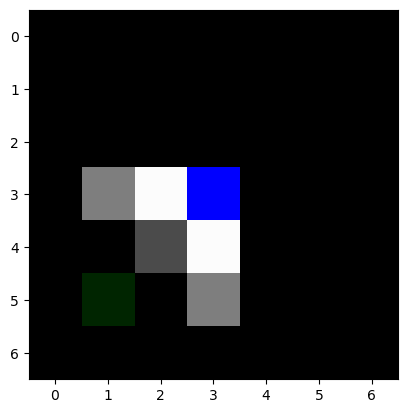

In [24]:
mult_agent.animate_last_replay(type_object='agents',name='test18',object_id=1)

In [8]:
load =runners.MazeRunnerAgent.load('MazeRunner')
testing_dataset = md.Maze_dataset(1,shape=(3,3),maze_type='percolation')
load.run_agent(testing_dataset[0],len_game=15,n_episodes=20,
               start_dist=None,num_objects={'agents':2})

TypeError: DQN.agents.basic.BaseAgent.__init__() got multiple values for keyword argument 'game_info'

In [11]:
load.test_agent(testing_dataset,n_episodes=1000,len_game=15,
                num_objects={'agents':2},start_dist=None)

/home/cody/miniconda3/envs/GameRFL/lib/python3.12/site-packages/gymnasium/utils/passive_env_checker.py:245: UserWarning: WARN: The reward returned by `step()` must be a float, int, np.integer or np.floating, actual type: <class 'dict'>
  logger.warn(


{'agents': 0.9660000000000007}

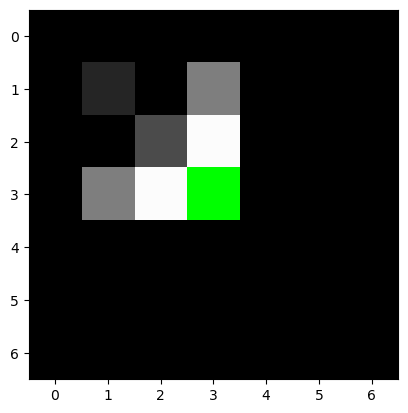

In [9]:
load.animate_last_replay('agents',0,'vision')

In [10]:
#load.make_gif('None',testing_dataset,len_game=15,n_episodes=20,num_agents=1,
#              epsilon=0,frame_rate = 5)

In [37]:
# Testing the MultiHead agent

MH = multihead_basic.MultiHeadAgent({'agents': base.MH_CNN},{'agents':3},action_type='cardinal',
                                    dist_paradigm='path',game_info=maze_runner_info.MazeRunner())
MH.run_agent(maze,len_game = 15,n_episodes=1,num_objects={'agents':1},
             )

goal
cumulative reward: {'agents': [31.950000000000003]}
